# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. |
| Extra | Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library for handling path management
from pathlib import Path

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

TRIP_RECORDS_PATH = Path("./Datasets and Dictionary/trip_records/")
df = pd.read_parquet(TRIP_RECORDS_PATH / "2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Create a list of all the twelve files to read
file_list = os.listdir(TRIP_RECORDS_PATH)

# initialise an empty dataframe
final_sample = pd.DataFrame()

# Initialize the sampling fraction
SAMPLING_FRACTION = 0.05

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = (TRIP_RECORDS_PATH / file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        # Clean the column by removing any NA values
        df['tpep_pickup_datetime'].dropna(inplace=True)

        # Extract date and hour
        df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
        df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Filter and loop through only the unique dates since the relationship between date and time is 1:n.
        # Then loop through every hour of each date
        for date in df['pickup_date'].unique():
            daily_data = df[df['pickup_date'] == date]
            
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = daily_data[daily_data['pickup_hour'] == hour]

                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=SAMPLING_FRACTION, random_state=42)

                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        print(f"File sampled: {file_name}")
        # Concatenate the sampled data of all the dates to a single dataframe
        final_sample = pd.concat([final_sample, sampled_data])
        

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

final_sample.info()

File sampled: 2023-1.parquet
File sampled: 2023-10.parquet
File sampled: 2023-11.parquet
File sampled: 2023-12.parquet
File sampled: 2023-2.parquet
File sampled: 2023-3.parquet
File sampled: 2023-4.parquet
File sampled: 2023-5.parquet
File sampled: 2023-6.parquet
File sampled: 2023-7.parquet
File sampled: 2023-8.parquet
File sampled: 2023-9.parquet
<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2705104
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount       

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Limit the total entries to 300K
if len(final_sample) > 300000:
    final_sample = final_sample.sample(n=300000, random_state=42)

# Store the df in csv/parquet
final_sample.to_parquet('sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file

df = pd.read_parquet('sampled_data.parquet')

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
2118846,2,2023-04-21 01:37:42,2023-04-21 01:49:45,1.0,3.56,1.0,N,24,141,1,...,0.5,5.50,0.00,1.0,27.50,2.5,NaN,2023-04-21,1,0.00
828655,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.5,0.00,0.00,1.0,14.00,2.5,0.0,2023-01-10,14,NaN
374435,2,2023-02-04 15:03:50,2023-02-04 15:47:48,1.0,21.09,2.0,N,132,151,1,...,0.5,10.00,6.55,1.0,89.30,0.0,NaN,2023-02-04,15,1.25
2503231,2,2023-03-24 12:33:07,2023-03-24 12:59:15,2.0,2.57,1.0,N,186,239,1,...,0.5,5.46,0.00,1.0,32.76,2.5,NaN,2023-03-24,12,0.00
375011,2,2023-09-05 17:03:28,2023-09-05 17:12:44,1.0,1.74,1.0,N,142,237,1,...,0.5,3.58,0.00,1.0,21.48,2.5,NaN,2023-09-05,17,0.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2118846 to 1813634
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   store_and_fwd_flag     289777 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and set drop=True to prevent adding a new index column

df.reset_index(inplace=True, drop=True)

# Drop the store_and_fwd_flag column since it doesn't contribute to the fare analysis in this dataset.
# Also drop the mta_tax column since they are constant for all trips.

columns_to_be_dropped = ['store_and_fwd_flag', 'mta_tax']
df.drop(columns=columns_to_be_dropped, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   PULocationID           300000 non-null  int64         
 7   DOLocationID           300000 non-null  int64         
 8   payment_type           300000 non-null  int64         
 9   fare_amount            300000 non-null  float64       
 10  extra                  300000 non-null  float64       
 11  tip_amount             300000 non-null  float64       
 12  tolls_amount           300000 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns, and correct data if required

# Fill the missing values from airport_fee with values from Airport_fee, and vice-versa
df['airport_fee_combined'] = df['airport_fee'].combine_first(df['Airport_fee'])

# Drop the two airport fee columns
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   PULocationID           300000 non-null  int64         
 7   DOLocationID           300000 non-null  int64         
 8   payment_type           300000 non-null  int64         
 9   fare_amount            300000 non-null  float64       
 10  extra                  300000 non-null  float64       
 11  tip_amount             300000 non-null  float64       
 12  tolls_amount           300000 non-null  floa

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative

negative_fare_amount_df = df[df['fare_amount'] < 0]
negative_fare_amount_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               0 non-null      int64         
 1   tpep_pickup_datetime   0 non-null      datetime64[us]
 2   tpep_dropoff_datetime  0 non-null      datetime64[us]
 3   passenger_count        0 non-null      float64       
 4   trip_distance          0 non-null      float64       
 5   RatecodeID             0 non-null      float64       
 6   PULocationID           0 non-null      int64         
 7   DOLocationID           0 non-null      int64         
 8   payment_type           0 non-null      int64         
 9   fare_amount            0 non-null      float64       
 10  extra                  0 non-null      float64       
 11  tip_amount             0 non-null      float64       
 12  tolls_amount           0 non-null      float64       
 13  improvement_surcharge 

Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts

negative_fare_amount_df['RatecodeID'].value_counts()

Series([], Name: count, dtype: int64)

In [16]:
# Find which columns have negative values

# First, get a list of all columns with numeric values
cols_with_numeric_values = df.select_dtypes(include=['int', 'float']).columns

# Next, identify all columns with negative values
cols_with_negative_values = df[cols_with_numeric_values].columns[(df[cols_with_numeric_values] < 0).any()].tolist()
print(cols_with_negative_values)

['improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']


In [17]:
# fix these negative values

for col in cols_with_negative_values:
    df.loc[df[col] < 0, col] = df[col].abs()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   PULocationID           300000 non-null  int64         
 7   DOLocationID           300000 non-null  int64         
 8   payment_type           300000 non-null  int64         
 9   fare_amount            300000 non-null  float64       
 10  extra                  300000 non-null  float64       
 11  tip_amount             300000 non-null  float64       
 12  tolls_amount           300000 non-null  floa

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column

# Calculate the percentage of missing values and round off to two decimal points
missing_percentage = (df.isna().mean() * 100).round(2)

# Display the columns with null values
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

passenger_count         3.41
RatecodeID              3.41
congestion_surcharge    3.41
airport_fee_combined    3.41
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Impute NaN values in 'passenger_count'

# Compute the median of the passenger counts so it can be used to impute NaN values
PC_MEDIAN = df['passenger_count'].median()
df['passenger_count'].fillna(PC_MEDIAN, inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [20]:
df.loc[df['passenger_count'] == 0, 'passenger_count'] = PC_MEDIAN

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [21]:
# Identify the counts of all values present in the RatecodeID column

print(df['RatecodeID'].value_counts(dropna=False))

RatecodeID
1.0     273516
2.0      11357
NaN      10223
99.0      1681
5.0       1610
3.0        982
4.0        630
6.0          1
Name: count, dtype: int64


In [22]:
# Fix missing/incorrect values in 'RatecodeID'

# First, find the mode
RID_MODE = df['RatecodeID'].mode()[0]

# Next, fix NaN values by replacing them with the mode
df['RatecodeID'].fillna(RID_MODE, inplace=True)

# Finally, fix all codes with a value of 99.0 since it's invalid. Replace it with the mode.
df['RatecodeID'] = df['RatecodeID'].astype(int)
df.loc[df['RatecodeID'] == 99, 'RatecodeID'] = RID_MODE

print(df['RatecodeID'].value_counts(dropna=False))

RatecodeID
1    285420
2     11357
5      1610
3       982
4       630
6         1
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [23]:
# Print value counts in the congestion_surcharge column

df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
2.5    267413
0.0     22364
NaN     10223
Name: count, dtype: int64

In [24]:
# handle null values in congestion_surcharge
CS_MODE = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'].fillna(CS_MODE, inplace=True)

print(df['congestion_surcharge'].value_counts())

congestion_surcharge
2.5    277636
0.0     22364
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [25]:
# Identify whether other columns have missing values

print(df.isna().any())

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
pickup_date              False
pickup_hour              False
airport_fee_combined      True
dtype: bool


In [26]:
# Handle invalid values for airport_fee_combined
AIRPORT_ZONE_IDS = {132, 138}
df['airport_fee_combined'] = df.apply(
    lambda row: 1.25 if ((row['PULocationID'] in AIRPORT_ZONE_IDS) or (row['DOLocationID'] in AIRPORT_ZONE_IDS)) else 0.0,
    axis=1
)

df['airport_fee_combined'].value_counts(dropna=False)

airport_fee_combined
0.00    268202
1.25     31798
Name: count, dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Function to create a box plot for each column to analyze
def create_box_plots(cols_to_analyze):
    cols_length = len(cols_to_analyze)

    # 3 box plots per row
    rows = (cols_length // 3) + (1 if cols_length % 3 != 0 else 0)

    # Create figure
    figure, axes = plt.subplots(nrows=rows, ncols=min(3,cols_length), figsize=(15, rows * 4))
    axes = axes.flatten()

    for index, col in enumerate(cols_to_analyze):
        ax = axes[index]

        # Compute lower and upper bound for the column's data
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Plot boxplot
        sns.boxplot(y=df[col], ax=ax, color="lightblue")

        # Highlight IQR bounds
        ax.axhline(y=lower_bound, color="red", linestyle="dashed", label="Lower IQR Bound")
        ax.axhline(y=upper_bound, color="red", linestyle="dashed", label="Upper IQR Bound")
        
        ax.set_title(f"Boxplot of {col}")
        ax.set_ylabel(col)
        ax.grid(True)
    
    # Hide any additional empty box plots
    for j in range(index + 1, len(axes)):
        figure.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

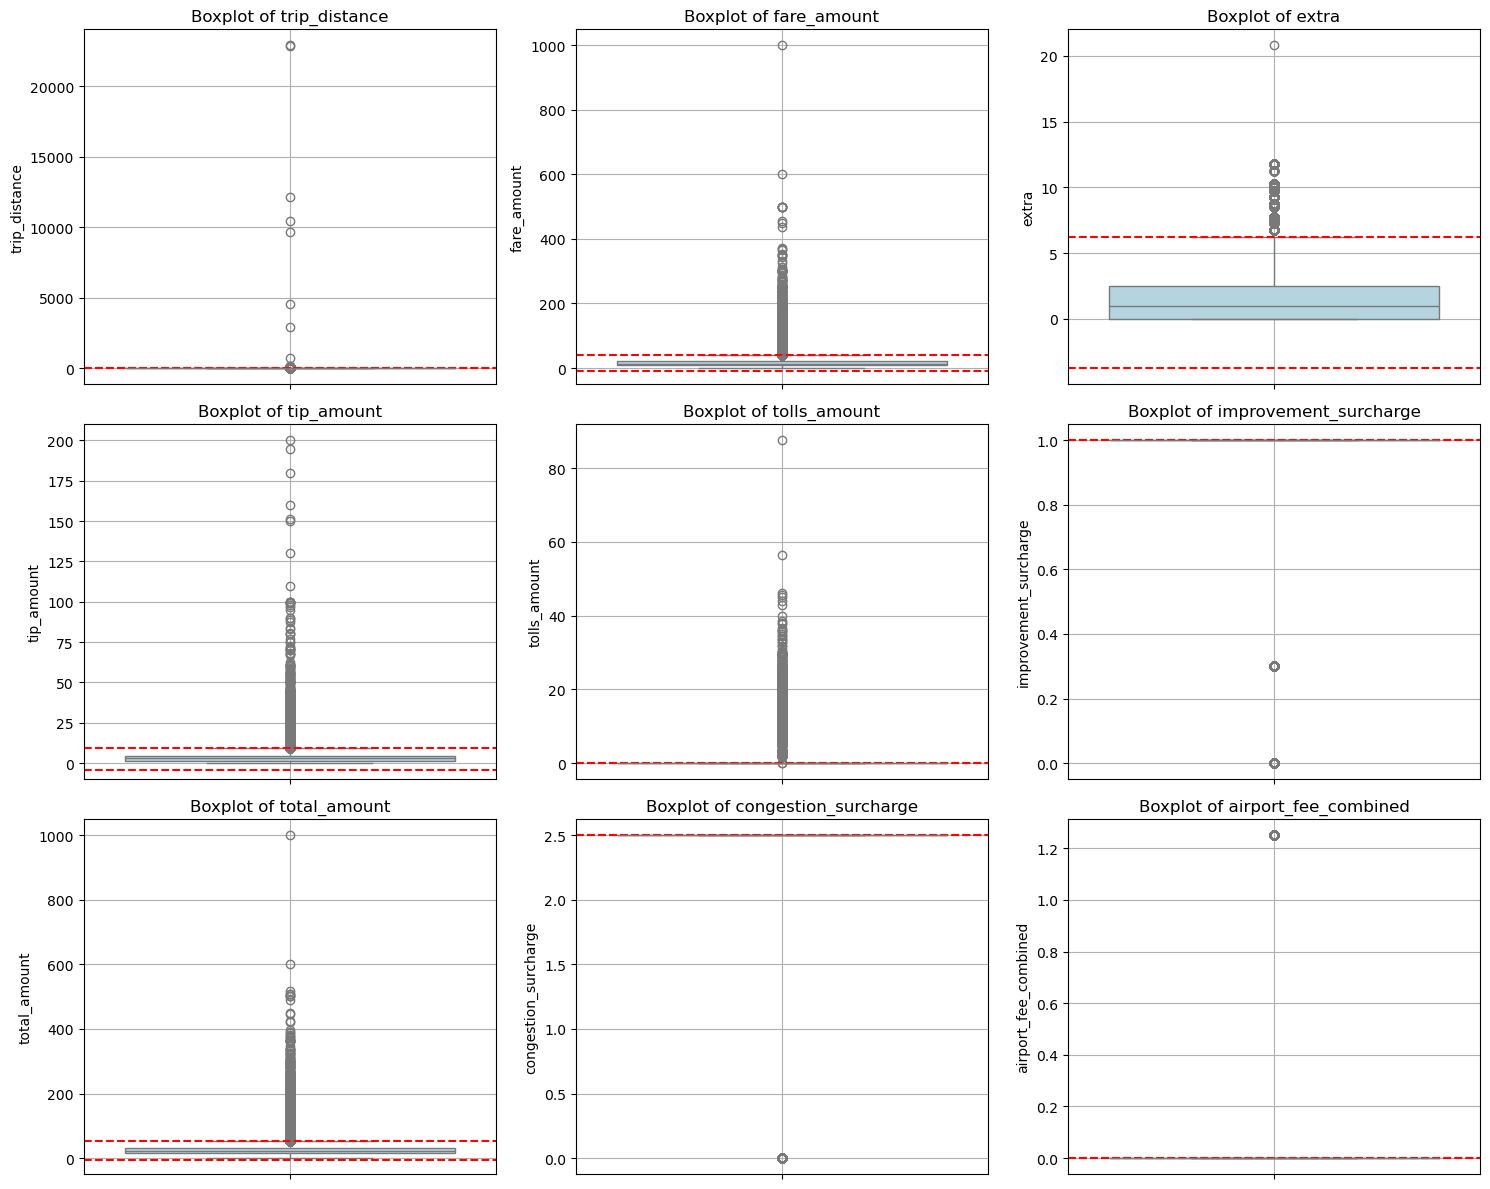

In [28]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

categorical_columns = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']

# Exclude categorical columns from numerical columns to perform outlier analysis.
# This is needed since some of the categorical columns are numbers, but they are ID values that signify a category.
all_numerical_columns = df.select_dtypes(include=['number']).columns
cols_to_analyze = [col for col in all_numerical_columns if col not in categorical_columns]

# Additionally, remove "pickup_hour" from the list of numerical columns
cols_to_analyze.remove('pickup_hour')
cols_to_analyze.remove('passenger_count')

create_box_plots(cols_to_analyze)

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [29]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6].reset_index(drop=True)

print(df['passenger_count'].value_counts())

passenger_count
1.0    232704
2.0     43938
3.0     10894
4.0      6130
5.0      3849
6.0      2484
Name: count, dtype: int64


In [30]:
# Handling for payment_type = 0. Replace with mode since 0 is not a valid payment type.
PT_MODE = df['payment_type'].mode()[0]
df.loc[df['payment_type'] == 0, 'payment_type'] = PT_MODE

# Handling for trip_distance > 250 miles
df = df[df['trip_distance'] <= 250].reset_index(drop=True)

# Handling for combination of trip_distance and fare_amount
condition1 = (df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)
condition2 = ((df['trip_distance'] == 0) & (df['fare_amount'] == 0)) & (df['PULocationID'] != df['DOLocationID'])
df = df[~(condition1 | condition2)].reset_index(drop=True)

df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,airport_fee_combined
count,299968.000000,299968,299968,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000,299968.000000
mean,1.733982,2023-07-03 00:13:37.026676,2023-07-03 00:31:01.549941,1.373133,3.440004,1.071991,165.222690,164.120026,1.198374,19.810717,1.584726,3.547829,0.590942,0.999013,28.866400,2.313797,14.257014,0.132477
min,1.000000,2023-01-01 00:04:55,2023-01-01 00:10:20,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2023-04-02 22:11:39.500000,2023-04-02 22:32:07,1.000000,1.040000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,1.000000,0.000000,1.000000,15.960000,2.500000,11.000000,0.000000
50%,2.000000,2023-06-27 16:13:03,2023-06-27 16:39:04,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,2.840000,0.000000,1.000000,21.000000,2.500000,15.000000,0.000000
75%,2.000000,2023-10-06 21:33:03.250000,2023-10-06 21:47:32.500000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,4.420000,0.000000,1.000000,30.800000,2.500000,19.000000,0.000000
max,6.000000,2023-12-31 23:45:46,2024-01-01 00:15:03,6.000000,172.710000,6.000000,265.000000,265.000000,4.000000,500.000000,20.800000,200.000000,87.500000,1.000000,516.690000,2.500000,23.000000,1.250000
std,0.447199,NaN,NaN,0.865299,4.538553,0.387080,64.134592,69.811524,0.459030,18.123846,1.828744,4.116374,2.174316,0.028810,22.717462,0.656382,5.816544,0.384768


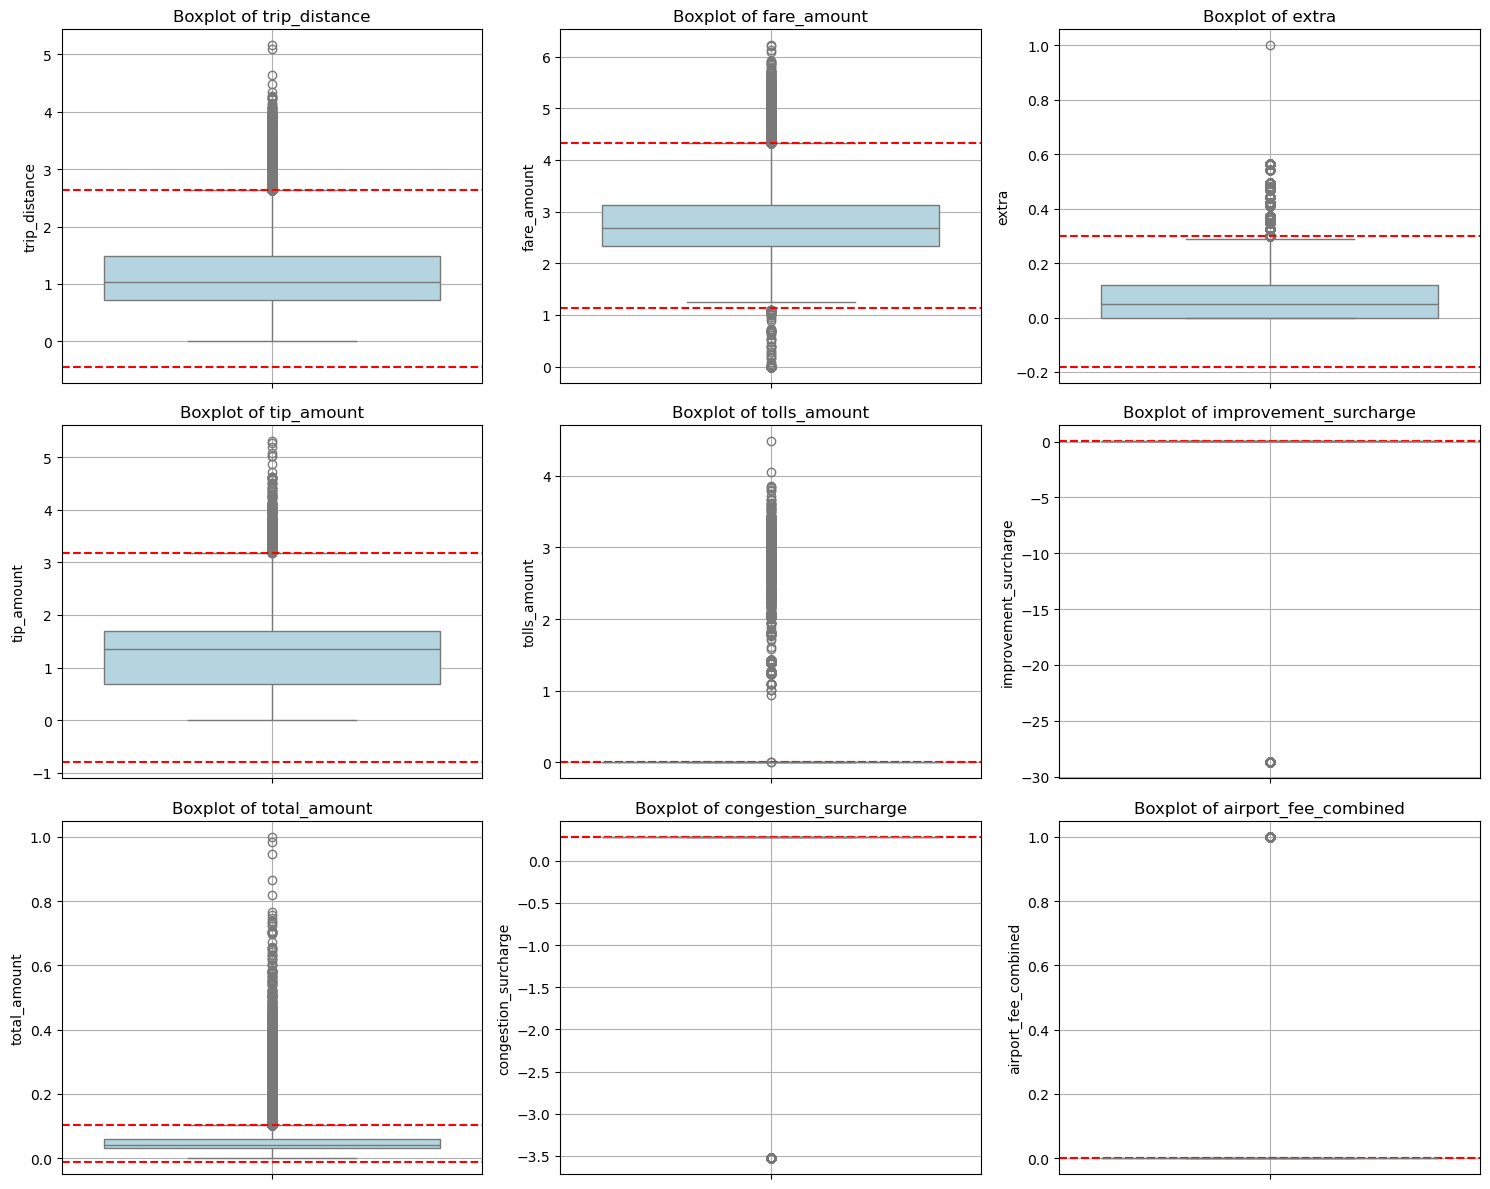

In [31]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

# Do any columns need standardising?

# Identify skewness of all columns being analyzed
skewness = df[cols_to_analyze].skew()

# Normalize positively skewed data
modetately_skewed_cols = skewness[(skewness > 1) & (skewness < 3)].index
scaler = MinMaxScaler()
df[modetately_skewed_cols] = scaler.fit_transform(df[modetately_skewed_cols])

highly_skewed_cols = skewness[skewness > 3].index
df[highly_skewed_cols] = np.log1p(df[highly_skewed_cols])

# Normalize negaitvely skewed data
left_skewed_cols = skewness[skewness < 1].index
power_transformer = PowerTransformer()
df[left_skewed_cols] = power_transformer.fit_transform(df[left_skewed_cols])

# Draw box plots after normalization
create_box_plots(cols_to_analyze)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Neither, this is a temporal variable
* `tpep_dropoff_datetime`: Neither, this is a temporal variable
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Ans: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

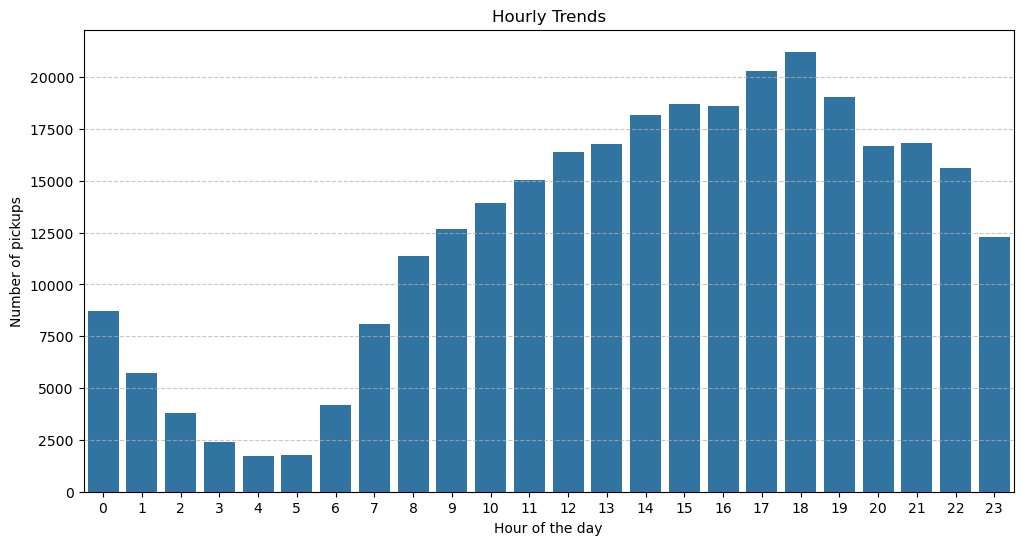

In [32]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(12,6))
sns.countplot(x='pickup_hour', data=df)
plt.title('Hourly Trends')
plt.xlabel('Hour of the day')
plt.ylabel('Number of pickups')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

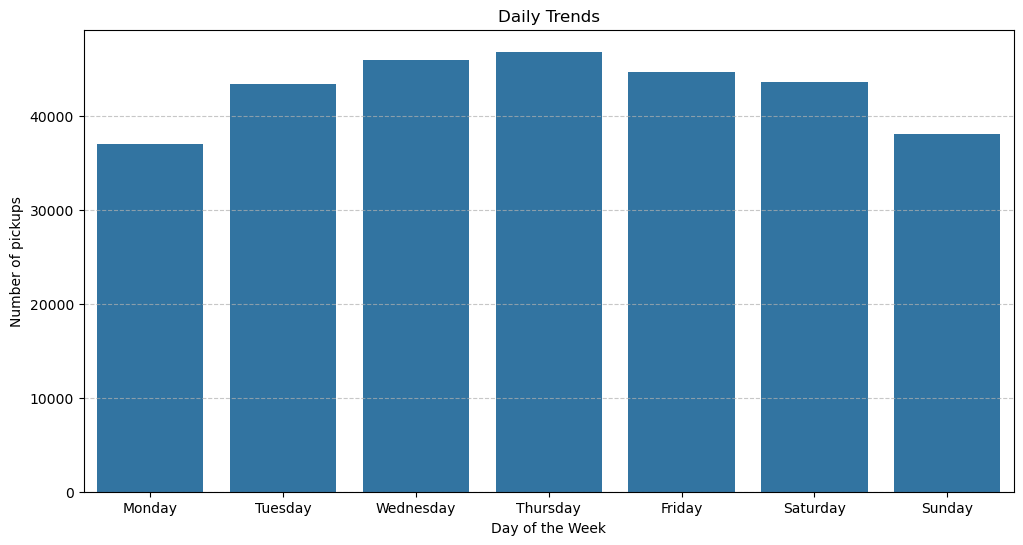

In [33]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_day'] = pd.Categorical(
    df['pickup_day'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

plt.figure(figsize=(12,6))
sns.countplot(x='pickup_day', data=df)
plt.title('Daily Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of pickups')
plt.xticks(range(0,7))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

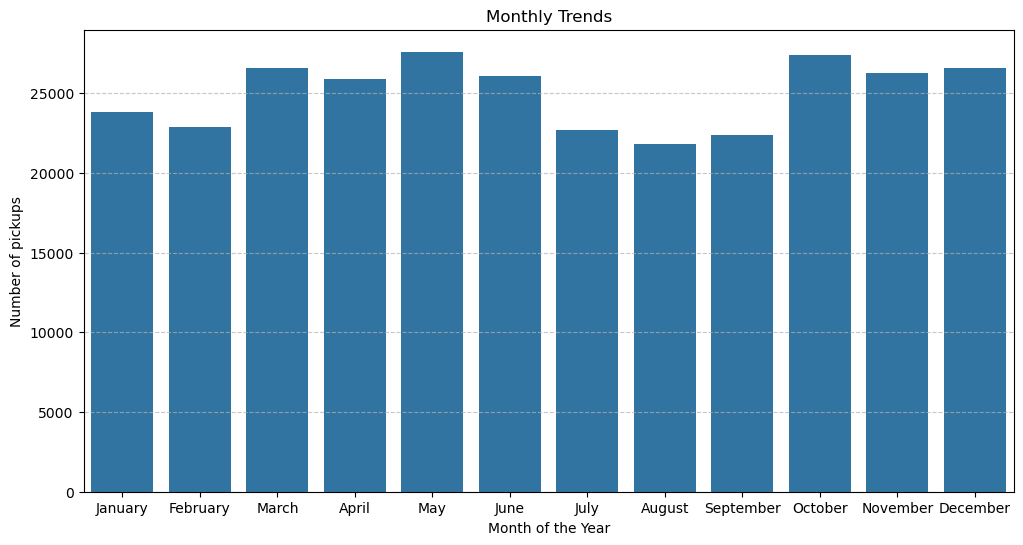

In [34]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
df['pickup_month'] = pd.Categorical(
    df['pickup_month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_month', data=df)
plt.title('Monthly Trends')
plt.xlabel('Month of the Year')
plt.ylabel('Number of pickups')
plt.xticks(range(0,12))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [35]:
# Analyse the above parameters

financial_params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
zero_values_exist = (df[financial_params] == 0).any()
print('Zero values exist:')
print(zero_values_exist)

negative_values_exist = (df[financial_params] < 0).any()
print('Negative values exist:')
print(negative_values_exist)

Zero values exist:
fare_amount      True
tip_amount       True
total_amount     True
trip_distance    True
dtype: bool
Negative values exist:
fare_amount      False
tip_amount       False
total_amount     False
trip_distance    False
dtype: bool


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Ans: Yes, this would allow for more accurate analysis of revenue, and ensuring we're only focusing on valid trip records, i.e with a trip_distance > 0

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [36]:
# Create a df with non zero entries for the selected parameters.

df_non_zero = df[
    (df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)
]

df_non_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229399 entries, 0 to 299967
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               229399 non-null  int64         
 1   tpep_pickup_datetime   229399 non-null  datetime64[us]
 2   tpep_dropoff_datetime  229399 non-null  datetime64[us]
 3   passenger_count        229399 non-null  float64       
 4   trip_distance          229399 non-null  float64       
 5   RatecodeID             229399 non-null  int32         
 6   PULocationID           229399 non-null  int64         
 7   DOLocationID           229399 non-null  int64         
 8   payment_type           229399 non-null  int64         
 9   fare_amount            229399 non-null  float64       
 10  extra                  229399 non-null  float64       
 11  tip_amount             229399 non-null  float64       
 12  tolls_amount           229399 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

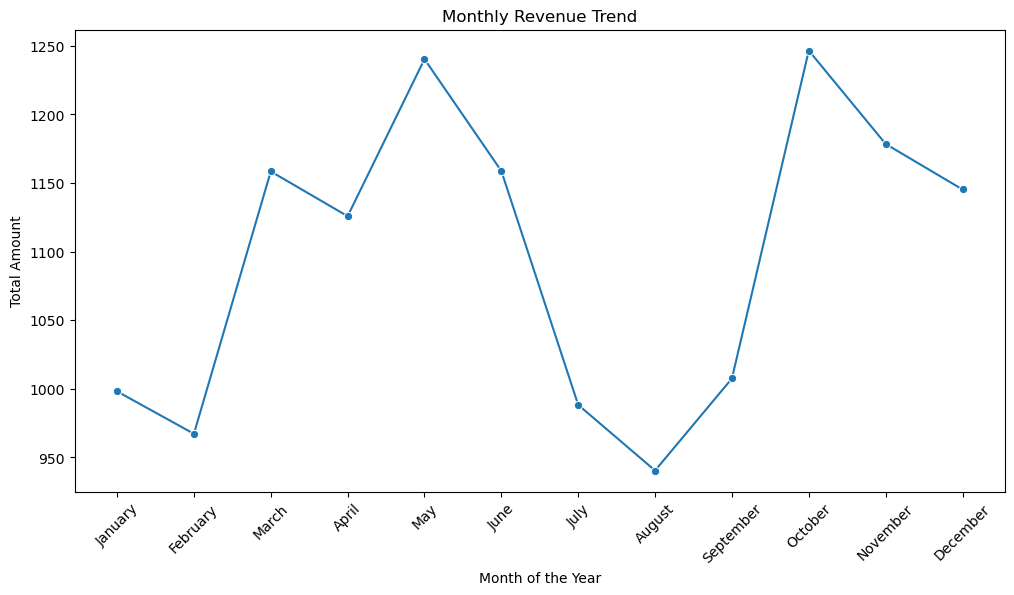

In [37]:
# Group data by month and analyse monthly revenue

monthly_revenue_trend = df_non_zero.groupby('pickup_month')['total_amount'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue_trend.index, y=monthly_revenue_trend.values, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month of the Year')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

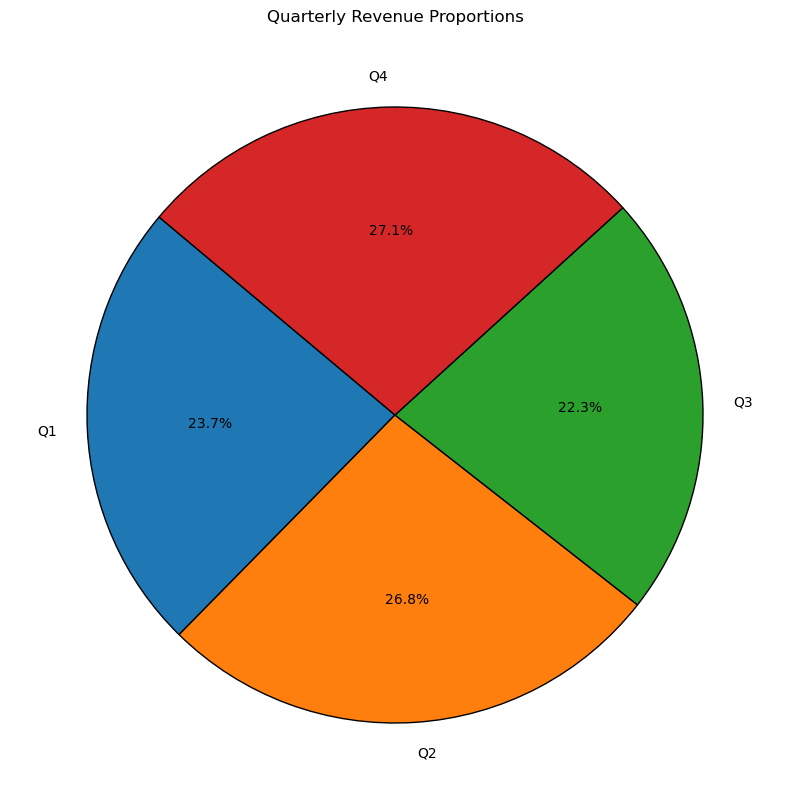

In [38]:
# Calculate proportion of each quarter

df_non_zero['pickup_quarter'] = df_non_zero['tpep_pickup_datetime'].dt.quarter
df_non_zero['pickup_quarter'] = pd.Categorical(
    df_non_zero['pickup_quarter'],
    categories=[1, 2, 3, 4],
    ordered=True
)

quarterly_revenue_proportion = df_non_zero.groupby('pickup_quarter')['total_amount'].sum()

plt.figure(figsize=(10,10))
plt.pie(
    quarterly_revenue_proportion.values,
    labels=[f"Q{q}" for q in quarterly_revenue_proportion.index],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Quarterly Revenue Proportions')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

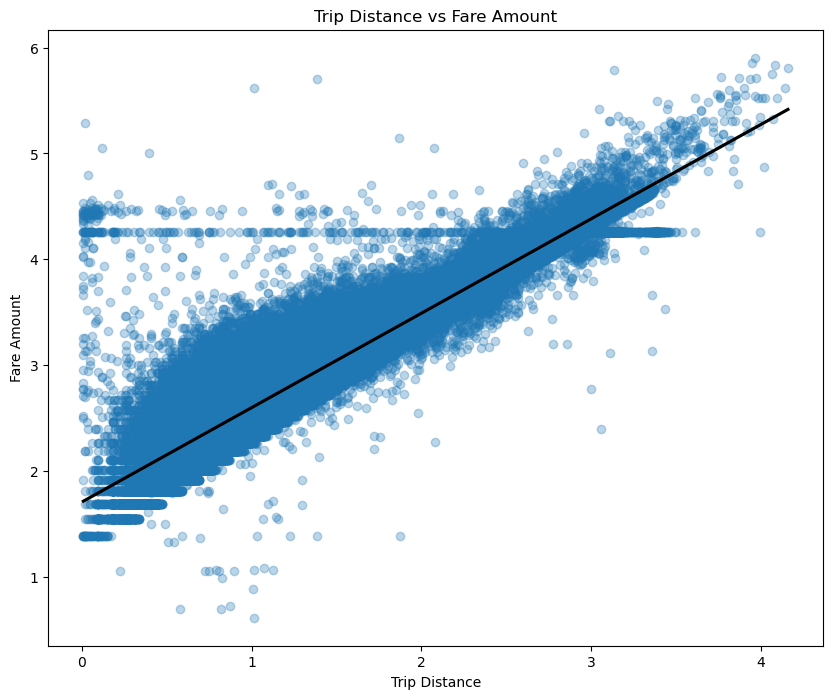

In [39]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10,8))
sns.regplot(
    x='trip_distance',
    y='fare_amount',
    data=df_non_zero,
    scatter_kws={'alpha':0.3},
    line_kws={'color': 'black'}
)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs Fare Amount')

plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

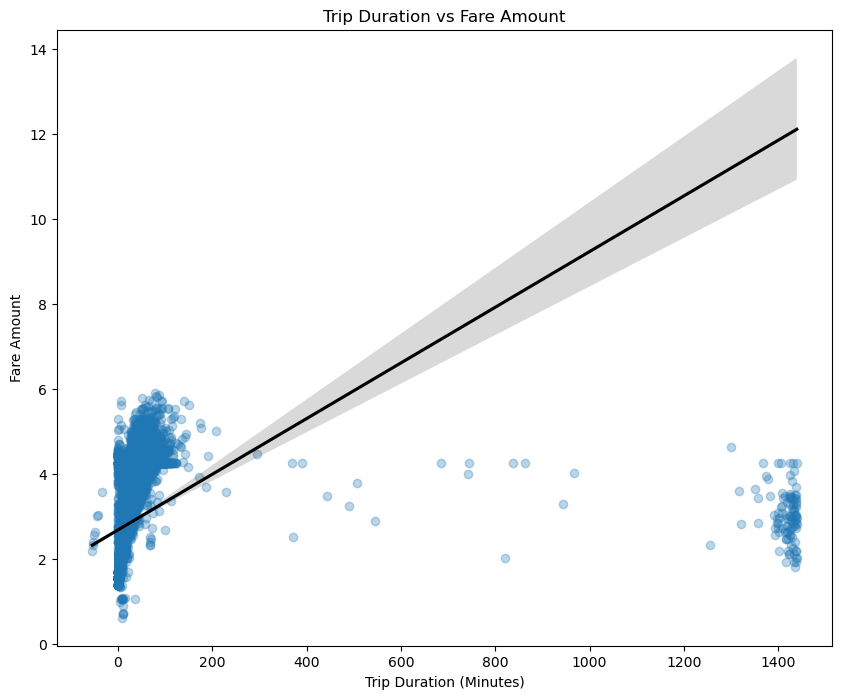

In [40]:
# Show relationship between fare and trip duration

df_non_zero['trip_duration_minutes'] = (df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10,8))
sns.regplot(
    x='trip_duration_minutes',
    y='fare_amount',
    data=df_non_zero,
    scatter_kws={'alpha':0.3},
    line_kws={'color': 'black'}
)
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Fare Amount')
plt.title('Trip Duration vs Fare Amount')

plt.show()

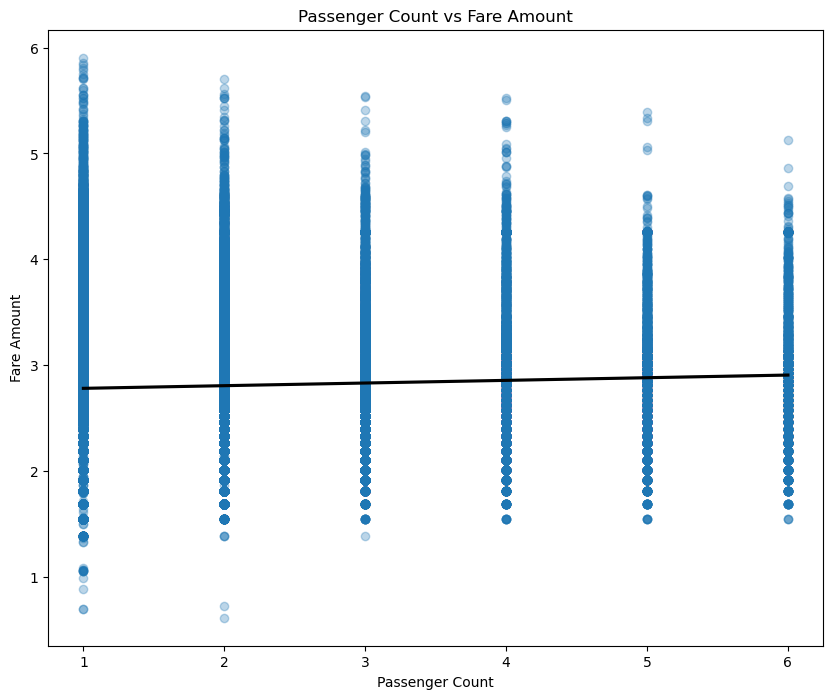

In [41]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10,8))
sns.regplot(
    x='passenger_count',
    y='fare_amount',
    data=df_non_zero,
    scatter_kws={'alpha':0.3},
    line_kws={'color': 'black'}
)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.title('Passenger Count vs Fare Amount')

plt.show()

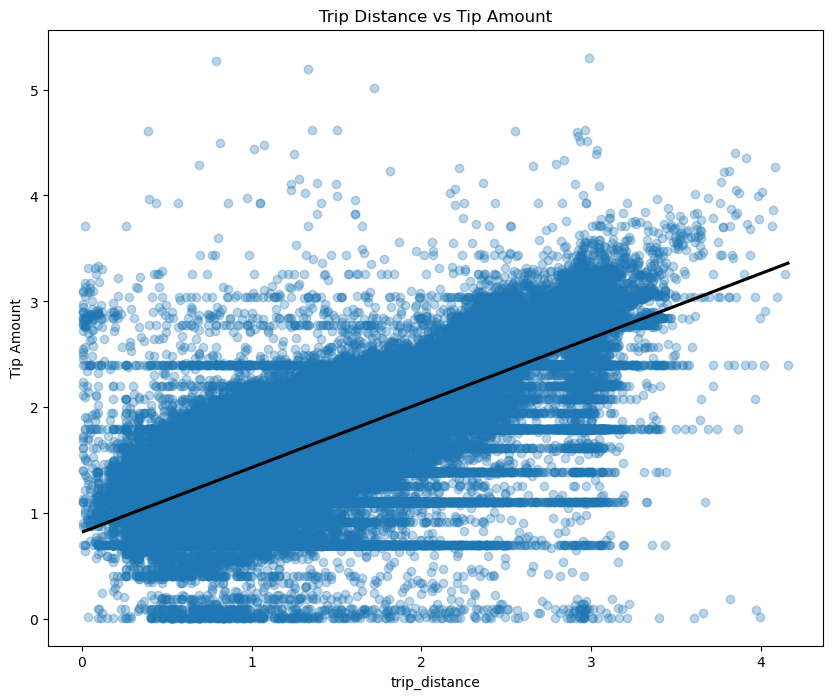

In [42]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10,8))
sns.regplot(
    x='trip_distance',
    y='tip_amount',
    data=df_non_zero,
    scatter_kws={'alpha':0.3},
    line_kws={'color': 'black'}
)
plt.xlabel('trip_distance')
plt.ylabel('Tip Amount')
plt.title('Trip Distance vs Tip Amount')

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

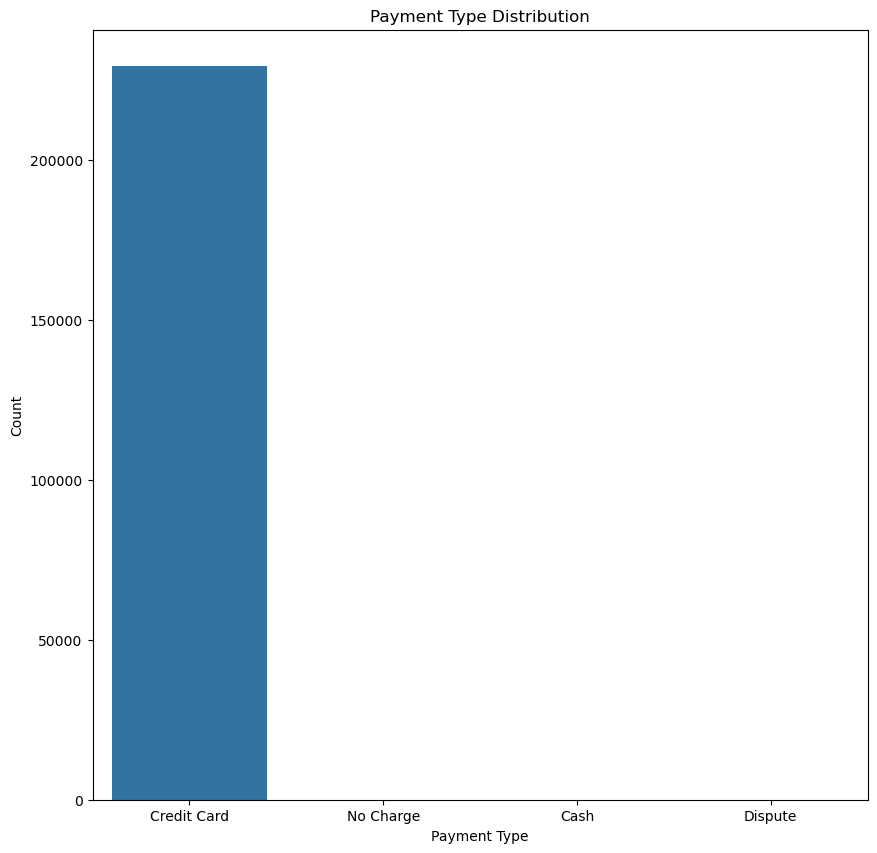

In [43]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df_non_zero['payment_type'].value_counts()
payment_types = payment_counts.index.map({
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
})

plt.figure(figsize=(10,10))
sns.barplot(
    x=payment_types,
    y=payment_counts.values
)
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [44]:
# pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [45]:
import geopandas as gpd
TAXI_ZONES_PATH = Path("./Datasets and Dictionary/taxi_zones/")

# Read the shapefile using geopandas
zones = gpd.read_file(TAXI_ZONES_PATH / 'taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

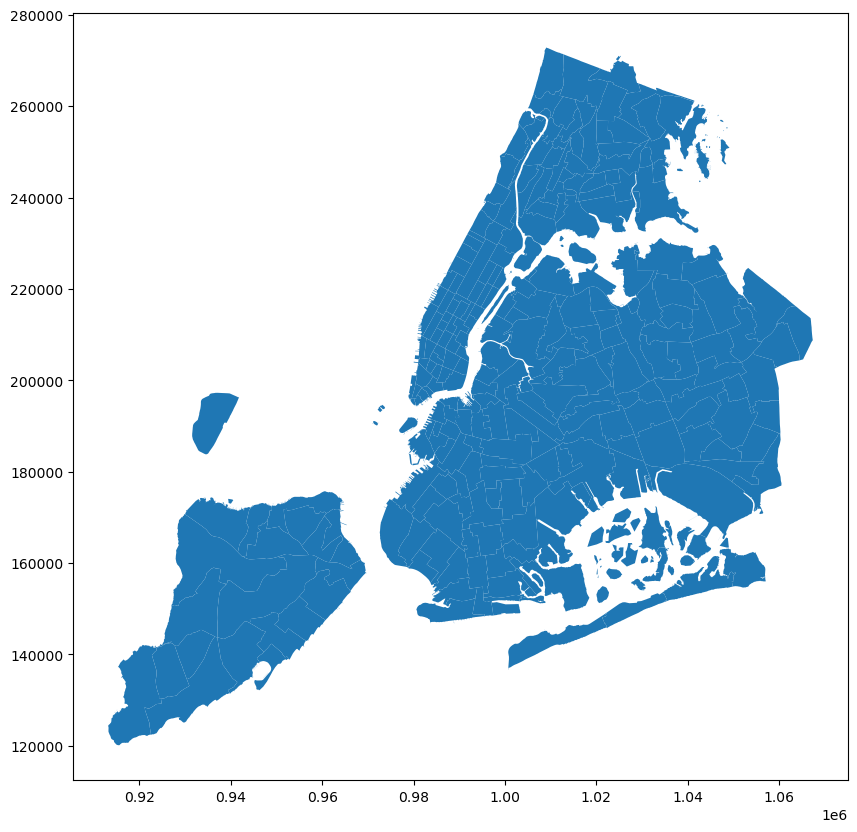

In [46]:
print(zones.info())
zones.plot(figsize=(10,10))

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [47]:
# Merge zones and trip records using locationID and PULocationID

trips_zones_merged = df_non_zero.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')
trips_zones_merged.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_month,pickup_quarter,trip_duration_minutes,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-04-21 01:37:42,2023-04-21 01:49:45,1.0,1.517323,1,24,141,1,2.890372,...,April,2,12.050000,24.0,0.047000,0.000061,Bloomingdale,24.0,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23..."
1,2,2023-02-04 15:03:50,2023-02-04 15:47:48,1.0,3.095125,2,132,151,1,4.262680,...,February,1,43.966667,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
2,2,2023-03-24 12:33:07,2023-03-24 12:59:15,2.0,1.272566,1,186,239,1,3.190476,...,March,1,26.133333,186.0,0.024696,0.000037,Penn Station/Madison Sq West,186.0,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21..."
3,2,2023-09-05 17:03:28,2023-09-05 17:12:44,1.0,1.007958,1,142,237,1,2.517696,...,September,3,9.266667,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
4,2,2023-11-15 08:41:24,2023-11-15 09:01:54,1.0,1.175573,1,236,161,1,2.965273,...,November,4,20.500000,236.0,0.044252,0.000103,Upper East Side North,236.0,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [48]:
# Group data by location and calculate the number of trips

trips_per_location = trips_zones_merged['LocationID'].value_counts().reset_index()
print(trips_per_location)

     LocationID  count
0         237.0  11327
1         161.0  10769
2         236.0  10258
3         132.0  10064
4         162.0   8495
..          ...    ...
170        34.0      1
171       257.0      1
172       131.0      1
173        63.0      1
174       178.0      1

[175 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [49]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trips_per_location, how='inner', on='LocationID')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",7
1,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",292
2,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.747 158679.855, 966615.256 15...",1
3,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",60
4,10,0.099839,0.000436,Baisley Park,10,Queens,"POLYGON ((1044355.072 190734.321, 1044612.122 ...",41


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

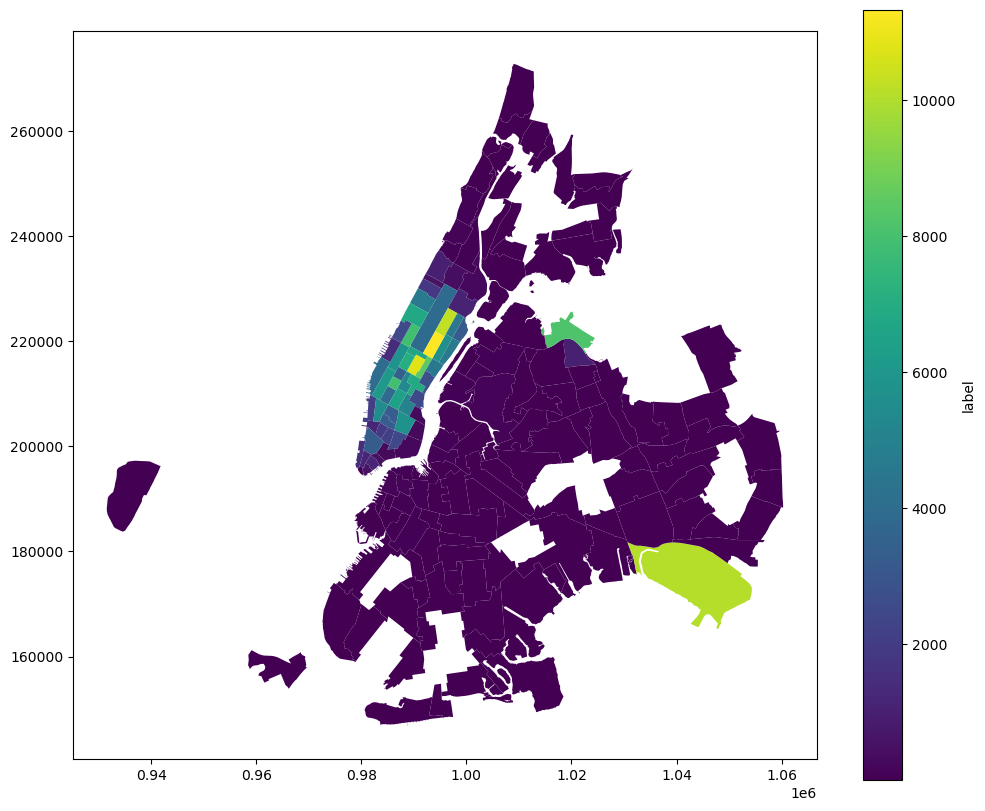

In [50]:
# Define figure and axis
figure, axis = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(
    column='count',
    ax=axis,
    legend=True,
    legend_kwds={'label': 'label', 'orientation': 'vertical'}
)
plt.show()

In [51]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by='count', ascending=False)
zones_sorted[['zone', 'count']]

,zone,count
158,Upper East Side South,11327
105,Midtown Center,10769
157,Upper East Side North,10258
82,JFK Airport,10064
106,Midtown East,8495
...,...,...
42,Dyker Heights,1
78,Inwood Hill Park,1
46,East Flatbush/Farragut,1
47,East Flatbush/Remsen Village,1


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [52]:
# Find routes which have the slowest speeds at different times of the day

route_statistics = trips_zones_merged.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_duration=('trip_duration_minutes', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()

route_statistics['speed'] = route_statistics['avg_distance'] / (route_statistics['avg_duration'] / 60)

# Filter our speeds of 0, and speeds greater than 20 mph
slowest_routes = route_statistics[(route_statistics['speed'] > 0) & (route_statistics['speed'] <= 20)].sort_values(by=['speed'], ascending=True)
slowest_routes

,PULocationID,DOLocationID,pickup_hour,avg_duration,avg_distance,speed
28458,151,24,1,1435.833333,0.412110,0.017221
2030,43,10,10,53.966667,0.019803,0.022017
43748,233,48,23,1429.650000,0.883768,0.037090
50164,246,43,8,1437.333333,1.280934,0.053471
35950,170,125,2,1399.983333,1.403643,0.060157
...,...,...,...,...,...,...
51569,249,125,6,1.216667,0.392042,19.333582
20260,137,232,8,3.783333,1.229641,19.500907
7418,74,75,21,1.383333,0.451076,19.564726
19787,137,107,4,1.366667,0.451076,19.803320


How does identifying high-traffic, high-demand routes help us?

There are benefits at multiple levels:

At a taxi company level, the companies can plan for more optimized driver allocation as well as plan their surge pricing more accurately during the busier hours.

At a city level, the government can plan to improve road infrastructure on the busier routes, which would in turn help with better traffic management.

All this would ideally lead to lower wait times for customers, and increase the probability of them getting to their destination on time.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

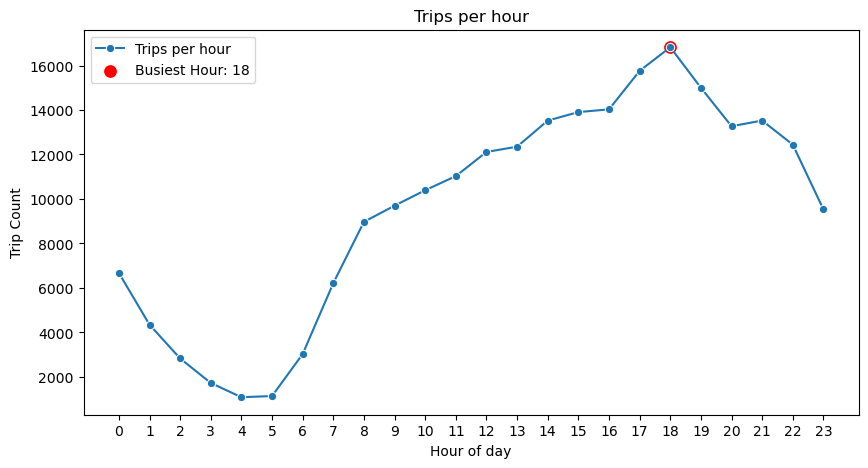

In [53]:
# Visualise the number of trips per hour and find the busiest hour

# Identify the busiest hour and the corresponding trip count
trips_per_hour = trips_zones_merged['pickup_hour'].value_counts().sort_index().reset_index()
busiest_hour = trips_per_hour.loc[trips_per_hour['count'].idxmax()]

# Plot a line graph and highlight the busiest hour
plt.figure(figsize=(10,5))
sns.lineplot(data=trips_per_hour, x='pickup_hour', y='count', marker='o', label='Trips per hour')
sns.scatterplot(x=[busiest_hour['pickup_hour']], y=[busiest_hour['count']], color='red', s=100, label=f'Busiest Hour: {busiest_hour['pickup_hour']}')
plt.title('Trips per hour')
plt.xlabel('Hour of day')
plt.ylabel('Trip Count')
plt.xticks(range(24))

plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [54]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
busiest_5_hours = trips_per_hour.nlargest(5, 'count').reset_index(drop=True)
busiest_5_hours['actual_trip_count'] = (busiest_5_hours['count'] / SAMPLING_FRACTION).astype(int)

busiest_5_hours

,pickup_hour,count,actual_trip_count
0,18,16822,336440
1,17,15758,315160
2,19,15000,300000
3,16,14029,280580
4,15,13905,278100


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

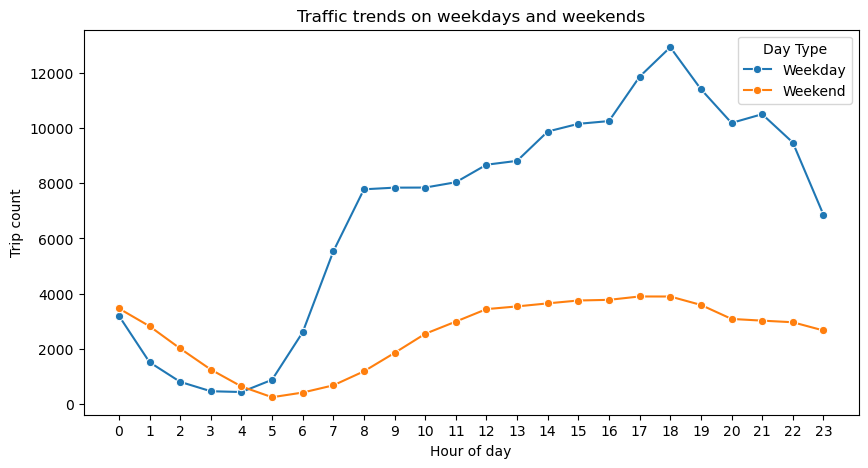

In [55]:
# Compare traffic trends for the week days and weekends

# First, create a dataframe that finds the trip count for each hour and day type
weekends = ['Saturday', 'Sunday']
trips_zones_merged['day_type'] = trips_zones_merged['pickup_day'].apply(lambda day: 'Weekend' if day in weekends else 'Weekday')
trip_counts_by_day_type = trips_zones_merged.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

# Plot a line graph to display the trend between weekday and weekend counts
plt.figure(figsize=(10,5))
sns.lineplot(data=trip_counts_by_day_type, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.xlabel('Hour of day')
plt.ylabel('Trip count')
plt.title('Traffic trends on weekdays and weekends')
plt.xticks(range(24))
plt.legend(title='Day Type')

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Inference: Weekdays have significantly more cab bookings than weekends, and the busiest hour is generally 6 PM.

How does this help us: This can help cab companies plan to deploy more drivers during the busy times to maximize revenue, and reduce wait times for customers. The city can use this data to plan their infrastructure so that it can handle the busiest times in a day.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

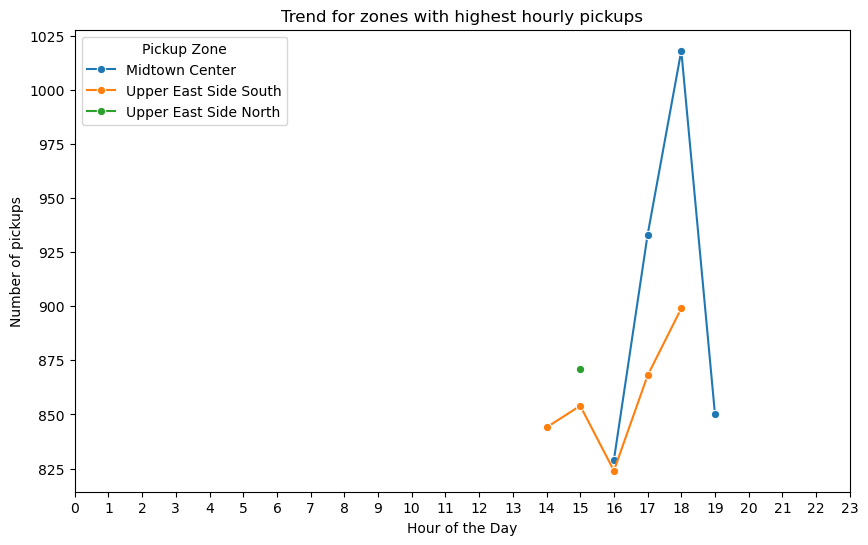

In [56]:
# Identify top 10 hourly pickup zones
pickup_data = trips_zones_merged.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')
top_pickup_zones = pickup_data.sort_values(by='pickup_count', ascending=False).head(10)
top_pickup_zones = (
    top_pickup_zones.merge(zones, how='inner', left_on='PULocationID', right_on='LocationID')[['pickup_hour', 'zone', 'pickup_count']]
        .rename(columns={'zone': 'pickup_zone'})
)

# Draw a line plot to display the pickup trend for each zone
plt.figure(figsize=(10,6))
sns.lineplot(
    data=top_pickup_zones,
    x='pickup_hour',
    y='pickup_count',
    hue='pickup_zone',
    marker='o'
)
plt.title('Trend for zones with highest hourly pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of pickups')
plt.xticks(range(24))
plt.legend(title='Pickup Zone', loc='upper left')

plt.show()

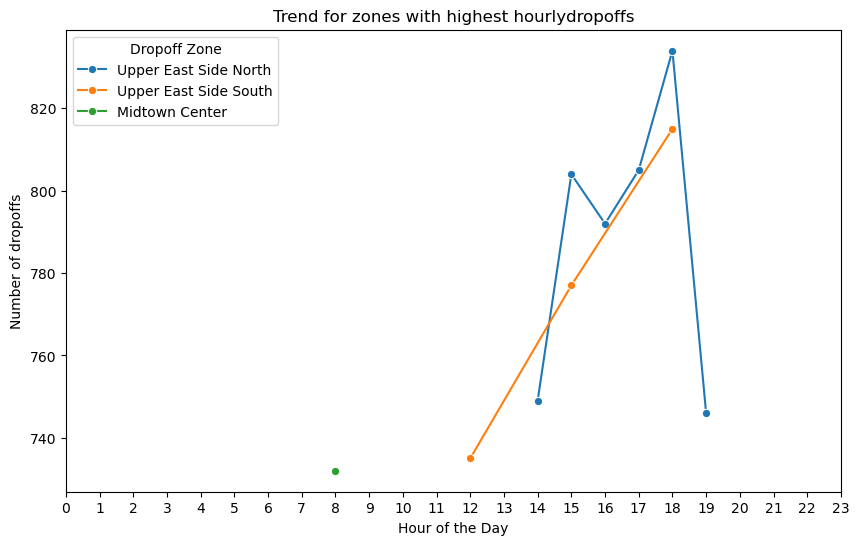

In [57]:
# Identify top 10 hourly dropoff zones
dropoff_data = (
    trips_zones_merged.groupby([
        trips_zones_merged['tpep_dropoff_datetime'].dt.hour,
        trips_zones_merged['DOLocationID']
    ])
    .size()
    .reset_index(name='dropoff_count')
    .rename(columns={'tpep_dropoff_datetime': 'dropoff_hour'})
)
top_dropoff_zones = dropoff_data.sort_values(by='dropoff_count', ascending=False).head(10)
top_dropoff_zones = (
    top_dropoff_zones.merge(zones, how='inner', left_on='DOLocationID', right_on='LocationID')[['dropoff_hour', 'zone', 'dropoff_count']]
        .rename(columns={'zone': 'dropoff_zone'})
)

# Draw a line plot to display the pickup trend for each zone
plt.figure(figsize=(10,6))
sns.lineplot(
    data=top_dropoff_zones,
    x='dropoff_hour',
    y='dropoff_count',
    hue='dropoff_zone',
    marker='o'
)
plt.title('Trend for zones with highest hourlydropoffs')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of dropoffs')
plt.xticks(range(24))
plt.legend(title='Dropoff Zone', loc='upper left')

plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [58]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_summary = pickup_data.groupby('PULocationID', as_index=False)['pickup_count'].sum()
pickup_summary = pickup_summary.rename(columns={'PULocationID': 'LocationID'})

dropoff_summary = dropoff_data.groupby('DOLocationID', as_index=False)['dropoff_count'].sum()
dropoff_summary = dropoff_summary.rename(columns={'DOLocationID': 'LocationID'})

zone_summary  = pd.merge(pickup_summary, dropoff_summary, how='outer', on='LocationID').fillna(0)
zone_summary = zone_summary.merge(zones, how='inner', on='LocationID')[['zone', 'pickup_count', 'dropoff_count']]
zone_summary['ratio'] = zone_summary['pickup_count'] / zone_summary['dropoff_count']

highest_ratios = zone_summary.nlargest(10, 'ratio')
print('\nZones with highest Pickup:Dropoff ratio:')
print(highest_ratios)

lowest_ratios = zone_summary.nsmallest(10, 'ratio')
print('\nZones with lowest Pickup:Dropoff ratio:')
print(lowest_ratios)


Zones with highest Pickup:Dropoff ratio:
                                 zone  pickup_count  dropoff_count      ratio
45                      East Elmhurst        1012.0             70  14.457143
82                        JFK Airport       10064.0           2398   4.196831
87                  LaGuardia Airport        8142.0           3133   2.598787
132  Saint Michaels Cemetery/Woodside           2.0              1   2.000000
119      Penn Station/Madison Sq West        7892.0           4724   1.670618
27                       Central Park        3936.0           2762   1.425054
70            Greenwich Village South        3306.0           2342   1.411614
167                      West Village        5443.0           4276   1.272919
106                      Midtown East        8495.0           6768   1.255171
65                   Garment District        3391.0           2770   1.224188

Zones with lowest Pickup:Dropoff ratio:
                           zone  pickup_count  dropoff_coun

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [59]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

nightly_pickups = pickup_data[(pickup_data['pickup_hour'] >= 22) | (pickup_data['pickup_hour'] < 5)]
nightly_pickups = nightly_pickups.groupby('PULocationID', as_index=False)['pickup_count'].sum()
nightly_pickups = nightly_pickups.rename(columns={'PULocationID': 'LocationID'})
nightly_pickups = nightly_pickups.merge(zones, on='LocationID', how='inner')[['zone', 'pickup_count']]

print('\nZones with highest nightly pickups:')
print(nightly_pickups.nlargest(10, 'pickup_count'))


nightly_dropoffs = dropoff_data[(dropoff_data['dropoff_hour'] >= 22) | (dropoff_data['dropoff_hour'] < 5)]
nightly_dropoffs = nightly_dropoffs.groupby('DOLocationID', as_index=False)['dropoff_count'].sum()
nightly_dropoffs = nightly_dropoffs.rename(columns={'DOLocationID': 'LocationID'})
nightly_dropoffs = nightly_dropoffs.merge(zones, on='LocationID', how='inner')[['zone', 'dropoff_count']]

print('\nZones with highest nightly dropoffs:')
print(nightly_dropoffs.nlargest(10, 'dropoff_count'))


Zones with highest nightly pickups:
                             zone  pickup_count
34                   East Village          2573
120                  West Village          2165
58                    JFK Airport          2132
18                   Clinton East          1676
50        Greenwich Village South          1531
69                Lower East Side          1465
107     Times Sq/Theatre District          1433
76                 Midtown Center          1277
64            Lincoln Square East          1227
87   Penn Station/Madison Sq West          1221

Zones with highest nightly dropoffs:
                      zone  dropoff_count
50            East Village           1529
88         Lenox Hill West           1281
66                Gramercy           1248
108            Murray Hill           1208
152  Upper East Side North           1188
28            Clinton East           1173
170         Yorkville West           1080
162           West Village           1064
155  Upper West Sid

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

<class 'pandas.core.series.Series'>


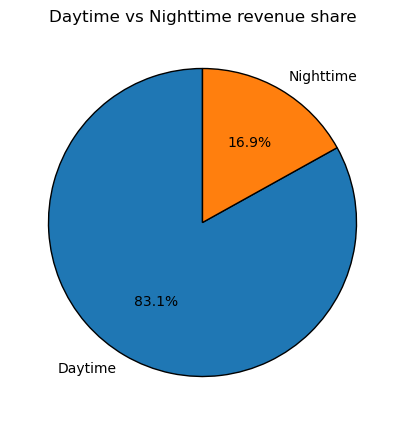

In [60]:
# Filter for night hours (11 PM to 5 AM)

revenue_share = trips_zones_merged[['pickup_hour', 'fare_amount']]
revenue_share['time_period'] = revenue_share['pickup_hour'].apply(
    lambda hour: 'Nighttime' if hour >= 22 or hour < 5 else 'Daytime'
)
revenue_share = revenue_share.groupby('time_period')['fare_amount'].sum()
print(type(revenue_share))

plt.figure(figsize=(10,5))
revenue_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Daytime vs Nighttime revenue share')

plt.ylabel('')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [61]:
# Analyse the fare per mile per passenger for different passenger counts

fare_details = trips_zones_merged[['passenger_count', 'fare_amount', 'trip_distance']]
fare_details['fare_per_mile'] = fare_details['fare_amount'] / fare_details['trip_distance']

fare_summary = fare_details.groupby('passenger_count')['fare_per_mile'].mean().reset_index()
fare_summary['fare_per_mile_per_passenger'] = fare_summary['fare_per_mile'] / fare_summary['passenger_count']

fare_summary

,passenger_count,fare_per_mile,fare_per_mile_per_passenger
0,1.0,2.843124,2.843124
1,2.0,2.798210,1.399105
2,3.0,2.880167,0.960056
3,4.0,3.047849,0.761962
4,5.0,2.704423,0.540885
5,6.0,2.675307,0.445885


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

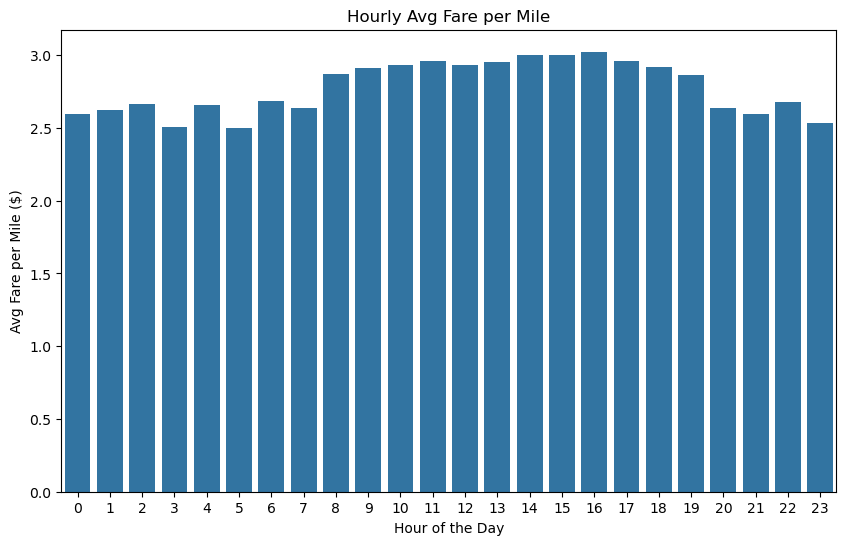

In [62]:
# Compare the average fare per mile for different times of the day

hourly_fare_details = trips_zones_merged[['fare_amount', 'trip_distance', 'pickup_hour']]
hourly_fare_details['fare_per_mile'] = hourly_fare_details['fare_amount'] / hourly_fare_details['trip_distance']

hourly_fare_per_mile = hourly_fare_details.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=hourly_fare_per_mile, x='pickup_hour', y='fare_per_mile')
plt.title('Hourly Avg Fare per Mile')
plt.xlabel('Hour of the Day')
plt.xticks(range(24))
plt.ylabel('Avg Fare per Mile ($)')
plt.show()


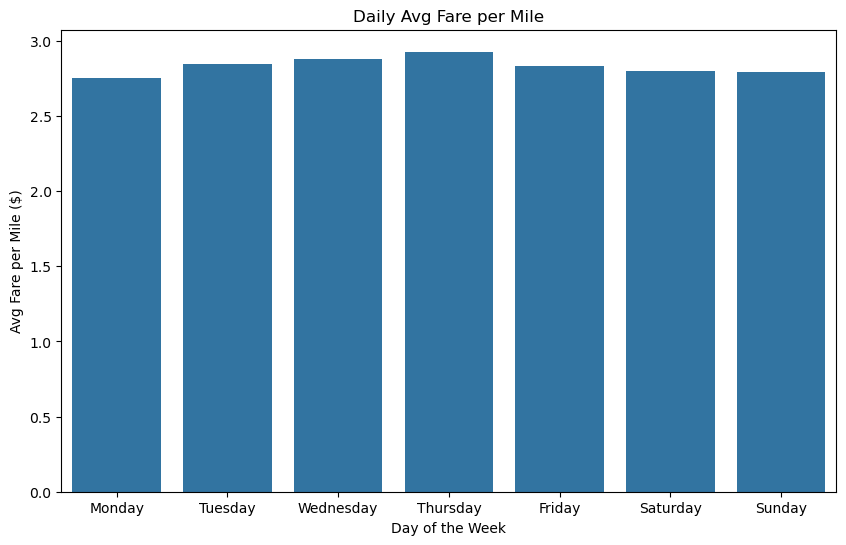

In [63]:
# Compare the average fare per mile for different days of the week

daily_fare_details = trips_zones_merged[['fare_amount', 'trip_distance', 'pickup_day']]
daily_fare_details['fare_per_mile'] = daily_fare_details['fare_amount'] / daily_fare_details['trip_distance']

daily_fare_per_mile = daily_fare_details.groupby('pickup_day')['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=daily_fare_per_mile, x='pickup_day', y='fare_per_mile')
plt.title('Daily Avg Fare per Mile')
plt.xlabel('Day of the Week')
plt.ylabel('Avg Fare per Mile ($)')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

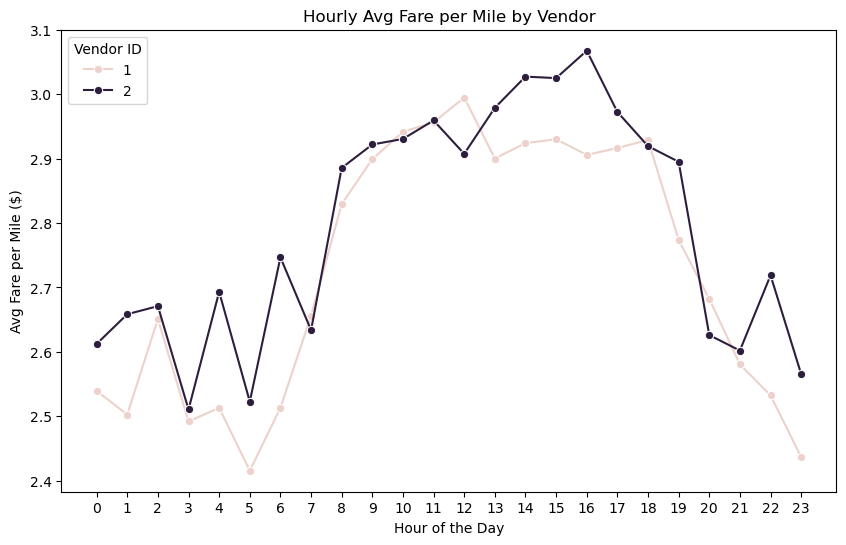

In [64]:
# Compare fare per mile for different vendors

vendor_fare_details = trips_zones_merged[['fare_amount', 'trip_distance', 'VendorID', 'pickup_hour']]
vendor_fare_details['fare_per_mile'] = vendor_fare_details['fare_amount'] / vendor_fare_details['trip_distance']

vendor_fare_summary = vendor_fare_details.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=vendor_fare_summary, x='pickup_hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Hourly Avg Fare per Mile by Vendor')
plt.xlabel('Hour of the Day')
plt.xticks(range(24))
plt.ylabel('Avg Fare per Mile ($)')
plt.legend(title='Vendor ID', loc='upper left')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


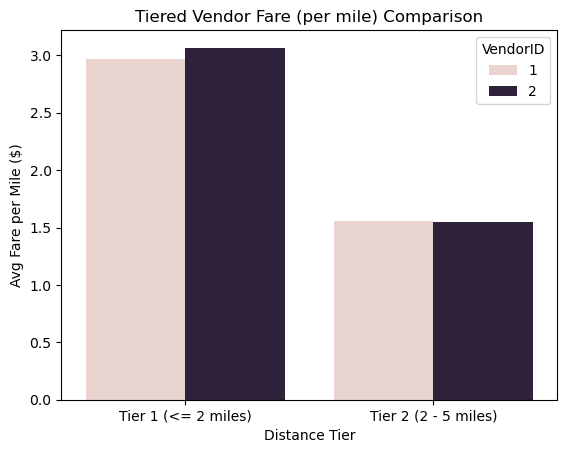

In [65]:
# Defining distance tiers

def compute_distance_tier (distance):
    if distance <= 2:
        return 'Tier 1 (<= 2 miles)'
    elif 2 < distance <=5:
        return 'Tier 2 (2 - 5 miles)'
    else:
        return 'Tier 3 (> 5 miles)'
    
tiered_distance_summary = trips_zones_merged[['VendorID', 'fare_amount', 'trip_distance']]
tiered_distance_summary['fare_per_mile'] = tiered_distance_summary['fare_amount'] / tiered_distance_summary['trip_distance']
tiered_distance_summary['distance_tier'] = tiered_distance_summary['trip_distance'].apply(compute_distance_tier)

tiered_vendor_fare_summary = tiered_distance_summary.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

plt.Figure(figsize=(10,6))
sns.barplot(data=tiered_vendor_fare_summary, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Tiered Vendor Fare (per mile) Comparison')
plt.xlabel('Distance Tier')
plt.ylabel('Avg Fare per Mile ($)')
plt.legend(title='VendorID')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [66]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

tip_details = trips_zones_merged[['tip_amount', 'fare_amount', 'trip_distance', 'passenger_count', 'pickup_hour']]
tip_details['tip_percentage'] = (tip_details['tip_amount'] / tip_details['fare_amount']) * 100

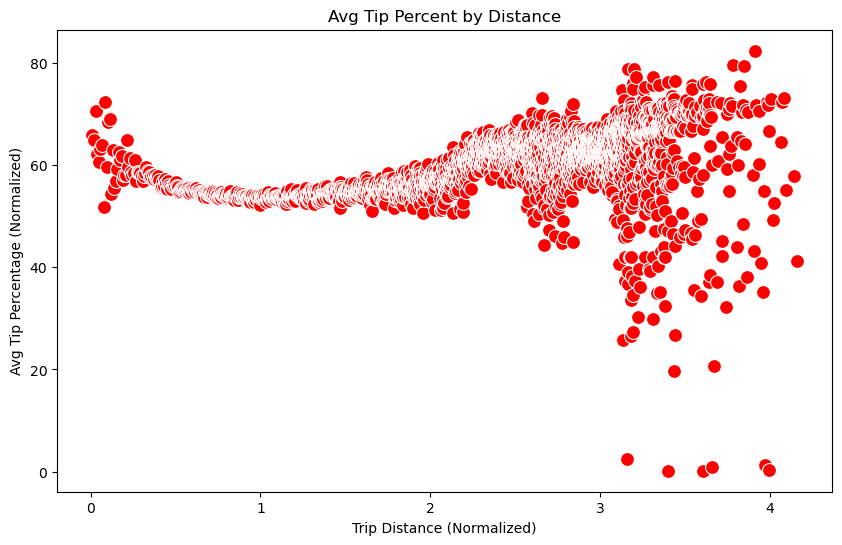

In [67]:
# Tip percentage vs distance
avg_tip_percent_by_distance = tip_details.groupby('trip_distance')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=avg_tip_percent_by_distance, x='trip_distance', y='tip_percentage', color='red', s=100)
plt.title('Avg Tip Percent by Distance')
plt.xlabel('Trip Distance (Normalized)')
plt.ylabel('Avg Tip Percentage (Normalized)')
plt.show()

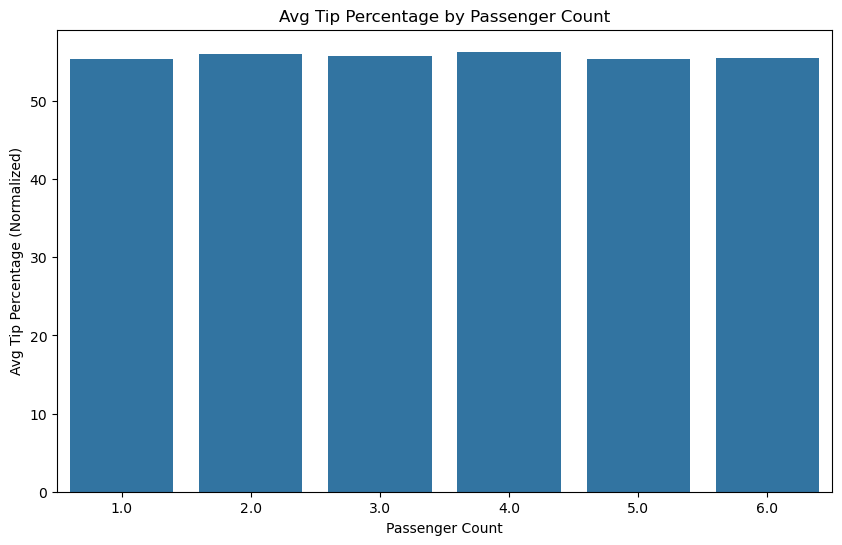

In [68]:
# Tip percentage vs passenger count
avg_tip_percent_by_passenger_count = tip_details.groupby('passenger_count')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_tip_percent_by_passenger_count, x='passenger_count', y='tip_percentage')
plt.title('Avg Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Avg Tip Percentage (Normalized)')
plt.show()


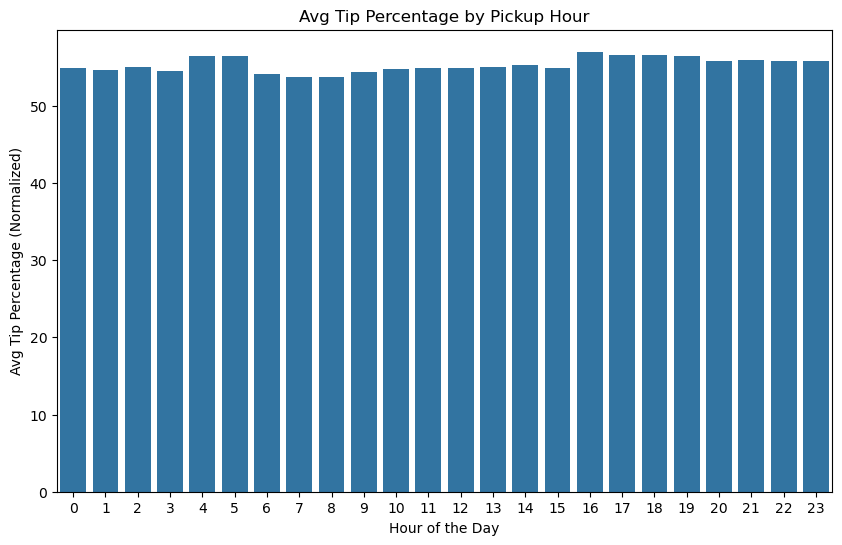

In [69]:
# Tip percentage by pickup hour
avg_tip_percent_by_pickup_hour = tip_details.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_tip_percent_by_pickup_hour, x='pickup_hour', y='tip_percentage')
plt.title('Avg Tip Percentage by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.xticks(range(24))
plt.ylabel('Avg Tip Percentage (Normalized)')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [70]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [71]:
# See how passenger count varies across hours and days

passenger_count_details = trips_zones_merged[['passenger_count', 'pickup_hour', 'pickup_day']]
passenger_count_details['passenger_count'] = passenger_count_details['passenger_count'].astype(int)

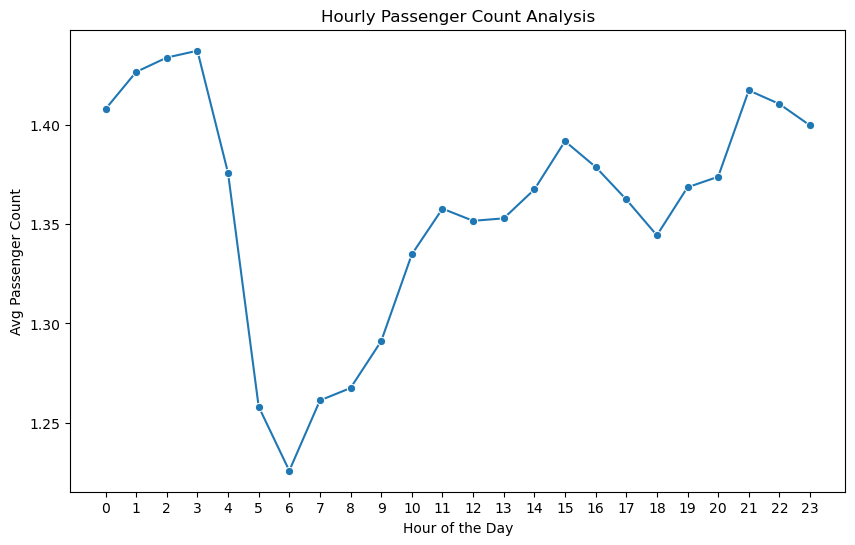

In [72]:
# Passenger Count Variation across the hours of the day
avg_hourly_passenger_count = passenger_count_details.groupby('pickup_hour')['passenger_count'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_hourly_passenger_count, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Hourly Passenger Count Analysis')
plt.xlabel('Hour of the Day')
plt.xticks(range(24))
plt.ylabel('Avg Passenger Count')
plt.show()

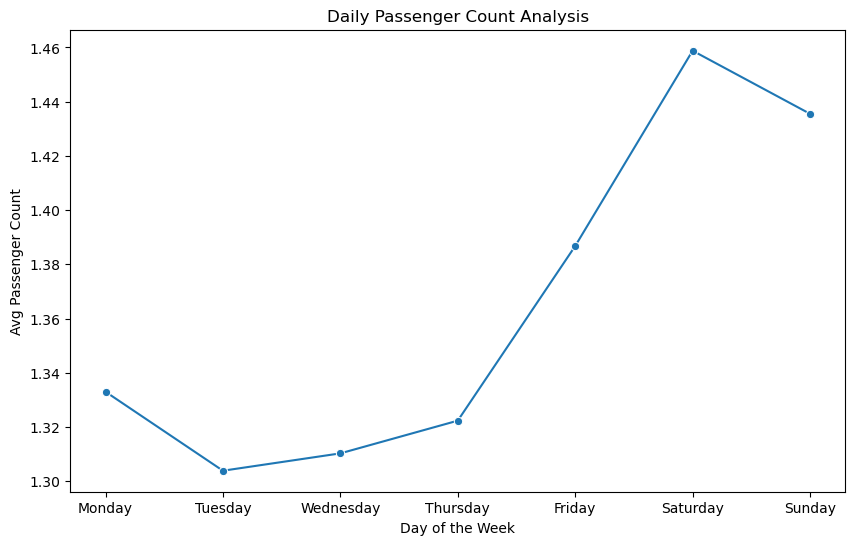

In [73]:
# Passenger Count Variation across the days of the week
avg_daily_passenger_count = passenger_count_details.groupby('pickup_day')['passenger_count'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_daily_passenger_count, x='pickup_day', y='passenger_count', marker='o')
plt.title('Daily Passenger Count Analysis')
plt.xlabel('Day of the Week')
plt.ylabel('Avg Passenger Count')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [74]:
# How does passenger count vary across zones

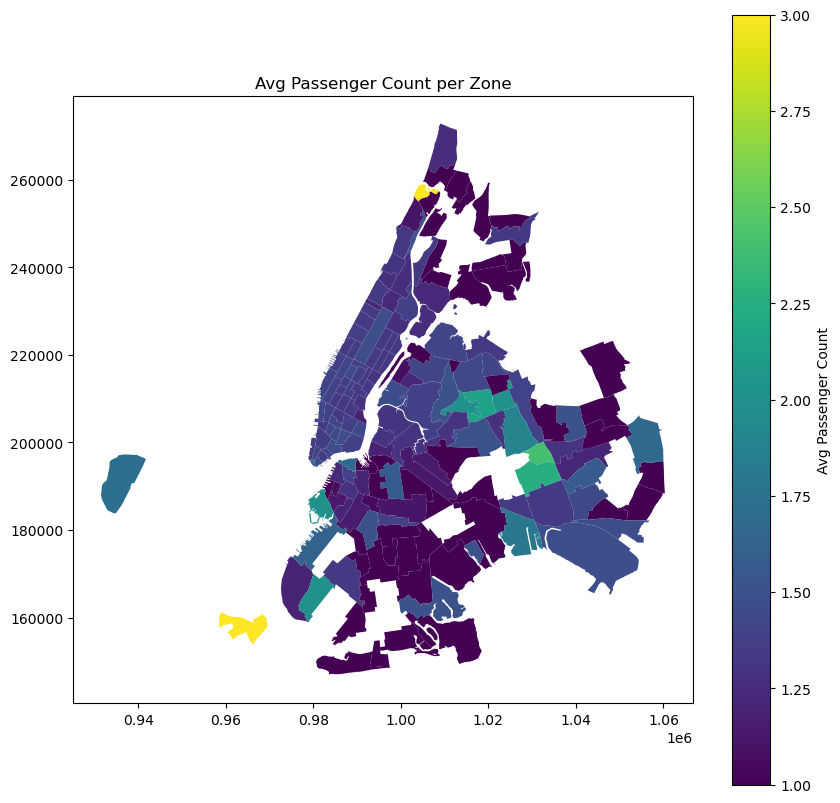

In [75]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zone_passenger_summary = trips_zones_merged[['LocationID', 'passenger_count']]
avg_passengers_per_zone = zone_passenger_summary.groupby('LocationID')['passenger_count'].mean().reset_index()

zones = zones.merge(avg_passengers_per_zone, how='inner', on='LocationID')
zones.plot(column='passenger_count', figsize=(10,10), legend=True, legend_kwds={'label': 'Avg Passenger Count', 'orientation': 'vertical'})
plt.title('Avg Passenger Count per Zone')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [81]:
# How often is each surcharge applied?

surcharge_data = trips_zones_merged[['extra', 'congestion_surcharge', 'improvement_surcharge', 'airport_fee_combined']].apply(lambda charge: (charge>0).sum()).reset_index()
surcharge_data.columns = ['Surcharge', 'Frequency of Occurrence']
surcharge_data

,Surcharge,Frequency of Occurrence
0,extra,142511
1,congestion_surcharge,218115
2,improvement_surcharge,229277
3,airport_fee_combined,23373


In [ ]:
# Hours of day during which surcharge is applied the most frequently
surcharge_columns = ['extra', 'congestion_surcharge', 'improvement_surcharge', 'airport_fee_combined']
surcharge_summary = trips_zones_merged.groupby('pickup_hour')[['extra', 'congestion_surcharge', 'improvement_surcharge', 'airport_fee_combined']].apply(lambda charge: (charge>0).sum()).reset_index()
surcharge_summary['total_surcharges'] = surcharge_summary[surcharge_columns].sum(axis=1)

surcharge_summary = surcharge_summary.sort_values(by='total_surcharges', ascending=False).reset_index()
surcharge_summary.head(5)['pickup_hour']

0    18
1    17
2    19
3    21
4    20
Name: pickup_hour, dtype: int32

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
1. The busiest hours in a day are between 3 PM and 7 PM, as observed in section 3.2.3. Dispatching more cabs at these times would really help to appease customer requests.
2. Surge Pricing can be re-evaluated during these hours to increase revenue
3. The passenger count significantly increases on Saturdays, as observed in section 3.2.14. Rebalancing the size of the vehicles that get dispatched on this day would greatly benefit customers. This would also lead to better fuel efficiency.

1.0

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
1. The zone with the highest number of pickups is Midtown Center. Dispatching additional vehicles to this zone, and thinking about zone based surge pricing would be beneficial.
2. Midtown Center is also one of the locations with a high number of dropoffs, especially during the mornings. This data should provide enough assurance that a healthy rotation of cabs would happen between pickup and dropoff locations.
3. The Upper East Side has multiple zones with a large number of trips. Ensuring that additional vehicles are stationed in these zones would greatly improve customer satisfaction, and consequently increase revenue.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1. Revenue being generated in the months of February and August is particularly low. Other graphs show that the number of trips during these months is also fairly low, so vendors would need to think about increasing the base price to make up for the difference in these months.
   Alternatively, they could think send out a survey to the general population to understand their needs during these months and devise a strategy based on that.
2. Vendors could think about adding multipliers that would increase the price based on the trip duration. This would allow them to deal with scenarios where the trip distance is short, but the duration is really long due to traffic.
   The biggest resource available to cab drives is time, the more time they spend on one trip, the more revenue they should generate to make up for other smaller trips that are being missed.
3. The Vendor with ID 2 seems to be doing significantly worse than Vendor with ID 1. They need to re-assess where they are falling short, either in the cab quality department, or customer waiting times department. This should help them be on par with their competitors.